In [9]:
!pip install tqdm
!pip install regex
!pip install nltk
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 762.6 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/299.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.5 MB/s eta 0:00:00


In [18]:
!pip install scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('fake_news_dataset.csv',index_col=0)
data.head()

,Body,Result
Headline,,
NASA Confirms Water on Mars,NASA scientists have confirmed the presence of...,1
COVID-19 Vaccine Contains Microchips,A viral post on social media claims that COVID...,0
Scientists Develop AI That Can Predict Earthquakes,Researchers at MIT have developed an AI model ...,1
5G Towers Cause COVID-19,Social media rumors suggest that 5G towers are...,0
Elon Musk Announces Plan to Colonize Mars by 2030,"In a recent press conference, Elon Musk shared...",1


In [6]:
data.shape

(496, 2)

<Axes: xlabel='Result', ylabel='count'>

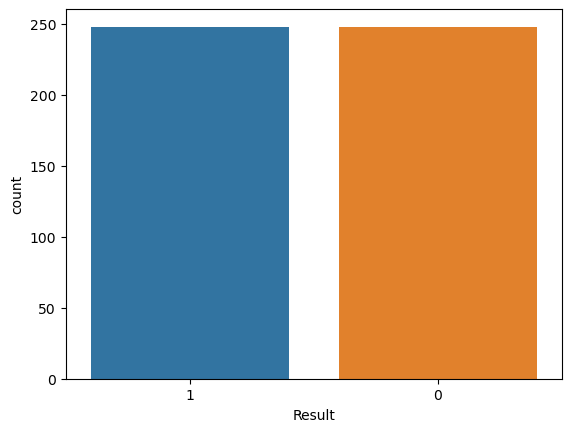

In [8]:
sns.countplot(data=data,
              x='Result',
              order=data['Result'].value_counts().index)

In [10]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to C:\Users\Saikabilane
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Saikabilane
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [12]:
preprocessed_review = preprocess_text(data['Body'].values)
data['Body'] = preprocessed_review

100%|████████████████████████████████████████████████████████████████████████████████| 496/496 [00:08<00:00, 59.27it/s]


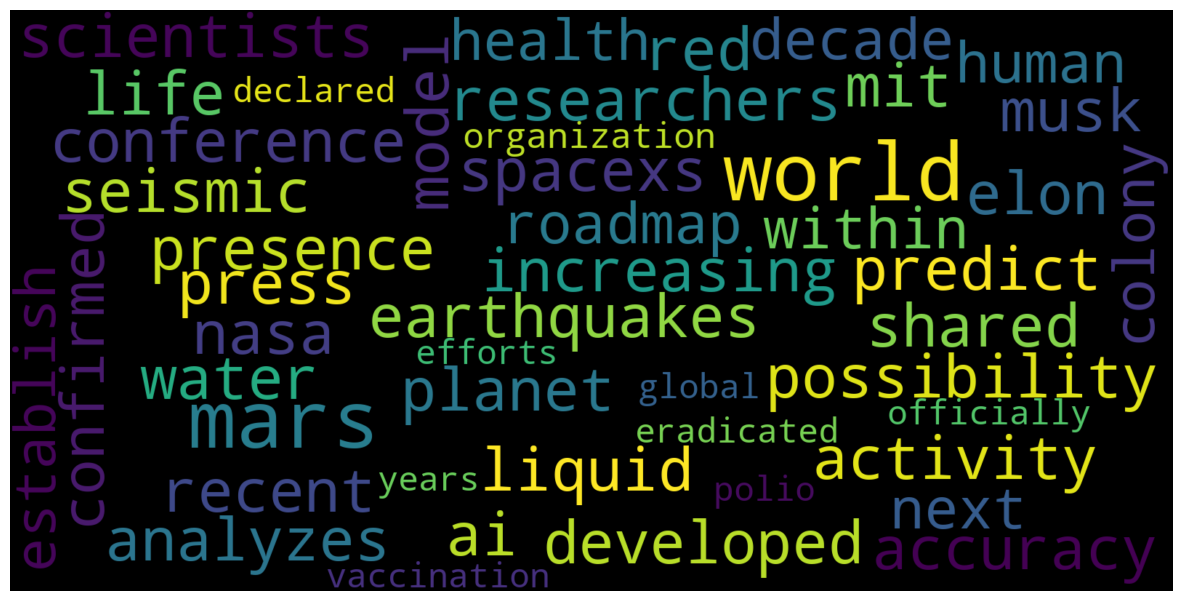

In [15]:
consolidated = ' '.join(
    word for word in data['Body'][data['Result'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

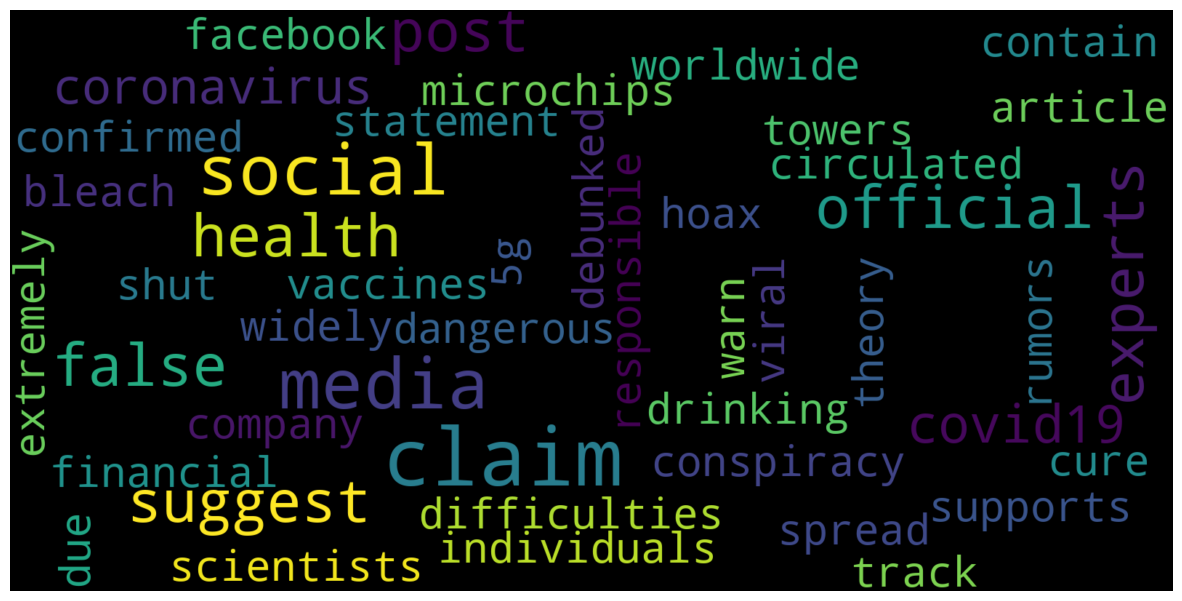

In [17]:
consolidated = ' '.join(
    word for word in data['Body'][data['Result'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

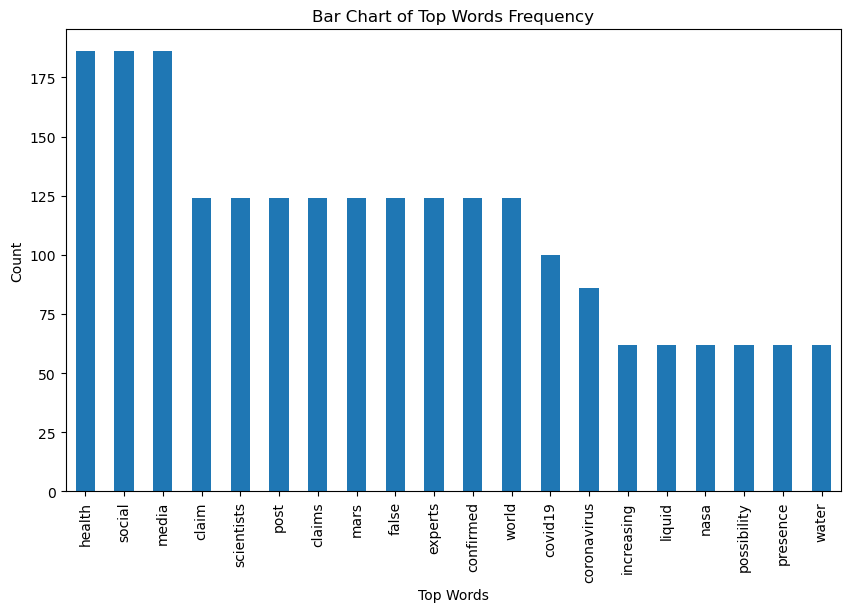

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['Body'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

<Figure size 1000x600 with 0 Axes>

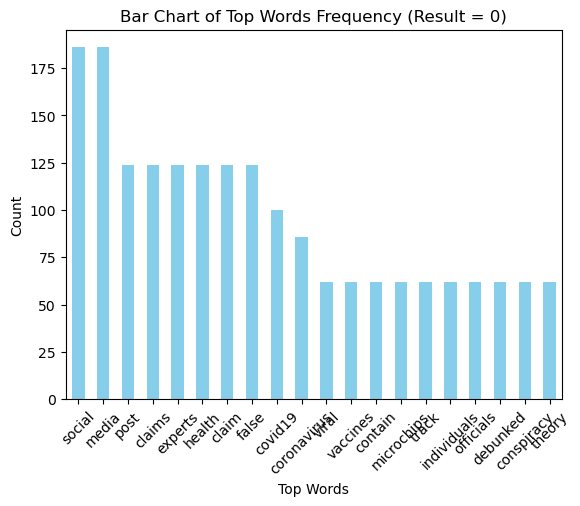

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

filtered_data = data[data['Result'] == 0]

common_words = get_top_n_words(filtered_data['Body'], 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
df1.set_index('Word').plot(kind='bar', legend=False, color='skyblue')
plt.xlabel("Top Words")
plt.ylabel("Count")
plt.title("Bar Chart of Top Words Frequency (Result = 0)")
plt.xticks(rotation=45)
plt.show()


In [24]:
df1

,Word,Count
0,social,186
1,media,186
2,post,124
3,claims,124
4,experts,124
5,health,124
6,claim,124
7,false,124
8,covid19,100
9,coronavirus,86


In [27]:
list(df1['Word'])

['social',
 'media',
 'post',
 'claims',
 'experts',
 'health',
 'claim',
 'false',
 'covid19',
 'coronavirus',
 'viral',
 'vaccines',
 'contain',
 'microchips',
 'track',
 'individuals',
 'officials',
 'debunked',
 'conspiracy',
 'theory']